C:\Users\bgpa4\AppData\Local\Temp\ipykernel_3772\3605822316.py:77: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


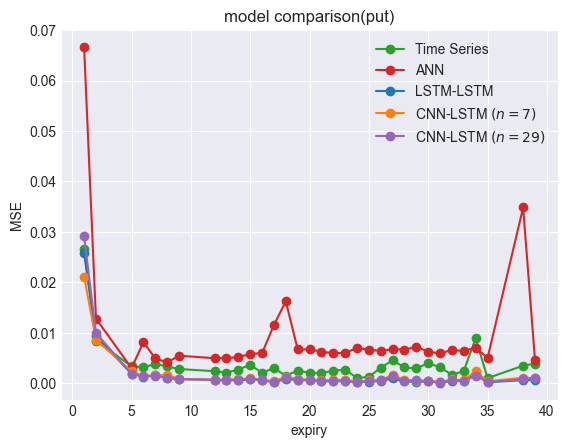

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

s_c = '結算價'

expiry_ = 'NearbyMonth'
K_num=100
type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

Model_types = ['TimeLinear', 'ANN', 'LSTM-LSTM', 'CNN-LSTM', 'CNN-LSTM']

Seq_Length1 = np.array([15, 29, 7, 7, 29])
Seq_Length2 = Seq_Length1 + 1
Labels = ['Time Series', 'ANN', 'LSTM-LSTM', \
          r'CNN-LSTM $(n={})$'.format(Seq_Length1[3]), r'CNN-LSTM $(n={})$'.format(Seq_Length1[4])]
colors = ['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e', '#9467bd']
min_contract_day = 2
forecast_variable = 'slope'
for i in range(len(Model_types)):
    model_type = Model_types[i]
    seq_length1 = Seq_Length1[i]
    seq_length2 = Seq_Length2[i]
    model_path = './../../../'
    model_Dir_tree = ['Forecast&model', expiry_, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
        'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
    for model_dir in model_Dir_tree:
        model_path = model_path + model_dir + '/'

    file_path = model_path + 'model1.csv'
    Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
    matrix = np.array(Data)
    columns_names = ['到期天數', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c)]

    column_index = [Data.columns.get_loc(col) for col in columns_names]
    expiry = np.unique(matrix[:,column_index[0]])
    ExpiryMSE = np.zeros((len(expiry)))
    #LinearExpiryMAE = np.zeros((len(Linear_expiry)))
    #LinearExpiryMAPE = np.zeros((len(Linear_expiry)))
    for k in range(len(expiry)):
        expiry_matrix = matrix[np.equal(matrix[:, column_index[0]], expiry[k])]
        y = expiry_matrix[:, column_index[1]]
        y_hat = expiry_matrix[:, column_index[2]]
        L2_Distance = np.zeros(int(len(y_hat) / K_num))
        #L1_Distance = np.zeros(int(len(y_hat) / K_num))
        #L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
        for j in range(len(L2_Distance)):
            y_day = y[j*K_num:(j+1)*K_num]
            y_hat_day = y_hat[j*K_num:(j+1)*K_num]
            l1_distance = np.sum(abs(y_day - y_hat_day))
            l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
            l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

            L2_Distance[j] = l2_distance
            #L1_Distance[j] = l1_distance
            #L1_Distance_a[j] = l1_distance_a

        MSE = np.mean(L2_Distance)
        #MAE = np.mean(L1_Distance)
        #RMSE = np.sqrt(MSE)
        #MAPE = np.mean(L1_Distance_a)
        #ExpiryMAE[k] = MAE
        ExpiryMSE[k] = MSE
        #ExpiryMAPE[k] = MAPE
    plt.plot(expiry, ExpiryMSE, marker='o', label=Labels[i], c=colors[i])



plt.style.use('seaborn-darkgrid')
plt.title('model comparison({})'.format(type_))
plt.legend()
plt.xlabel('expiry')
plt.ylabel('MSE')
plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_3772\2615353539.py:77: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


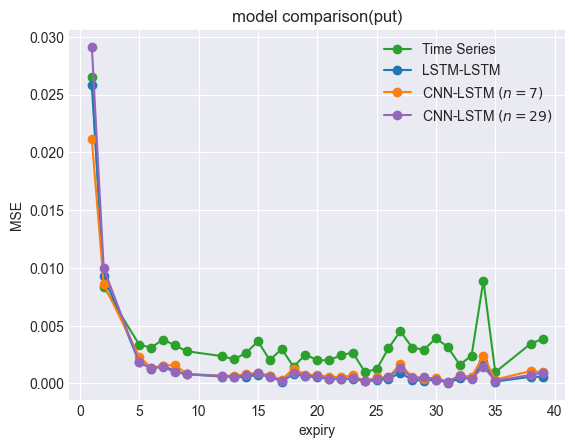

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

s_c = '結算價'

expiry_ = 'NearbyMonth'
K_num=100
type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

Model_types = ['TimeLinear', 'LSTM-LSTM', 'CNN-LSTM', 'CNN-LSTM']

Seq_Length1 = np.array([15, 7, 7, 29])
Seq_Length2 = Seq_Length1 + 1
Labels = ['Time Series', 'LSTM-LSTM', \
          r'CNN-LSTM $(n={})$'.format(Seq_Length1[2]), r'CNN-LSTM $(n={})$'.format(Seq_Length1[3])]
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd']
min_contract_day = 2
forecast_variable = 'slope'
for i in range(len(Model_types)):
    model_type = Model_types[i]
    seq_length1 = Seq_Length1[i]
    seq_length2 = Seq_Length2[i]
    model_path = './../../../'
    model_Dir_tree = ['Forecast&model', expiry_, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
        'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
    for model_dir in model_Dir_tree:
        model_path = model_path + model_dir + '/'

    file_path = model_path + 'model1.csv'
    Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
    matrix = np.array(Data)
    columns_names = ['到期天數', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c)]

    column_index = [Data.columns.get_loc(col) for col in columns_names]
    expiry = np.unique(matrix[:,column_index[0]])
    ExpiryMSE = np.zeros((len(expiry)))
    #LinearExpiryMAE = np.zeros((len(Linear_expiry)))
    #LinearExpiryMAPE = np.zeros((len(Linear_expiry)))
    for k in range(len(expiry)):
        expiry_matrix = matrix[np.equal(matrix[:, column_index[0]], expiry[k])]
        y = expiry_matrix[:, column_index[1]]
        y_hat = expiry_matrix[:, column_index[2]]
        L2_Distance = np.zeros(int(len(y_hat) / K_num))
        #L1_Distance = np.zeros(int(len(y_hat) / K_num))
        #L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
        for j in range(len(L2_Distance)):
            y_day = y[j*K_num:(j+1)*K_num]
            y_hat_day = y_hat[j*K_num:(j+1)*K_num]
            l1_distance = np.sum(abs(y_day - y_hat_day))
            l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
            l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

            L2_Distance[j] = l2_distance
            #L1_Distance[j] = l1_distance
            #L1_Distance_a[j] = l1_distance_a

        MSE = np.mean(L2_Distance)
        #MAE = np.mean(L1_Distance)
        #RMSE = np.sqrt(MSE)
        #MAPE = np.mean(L1_Distance_a)
        #ExpiryMAE[k] = MAE
        ExpiryMSE[k] = MSE
        #ExpiryMAPE[k] = MAPE
    plt.plot(expiry, ExpiryMSE, marker='o', label=Labels[i], c=colors[i])



plt.style.use('seaborn-darkgrid')
plt.title('model comparison({})'.format(type_))
plt.legend()
plt.xlabel('expiry')
plt.ylabel('MSE')
plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_3772\1584972952.py:234: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


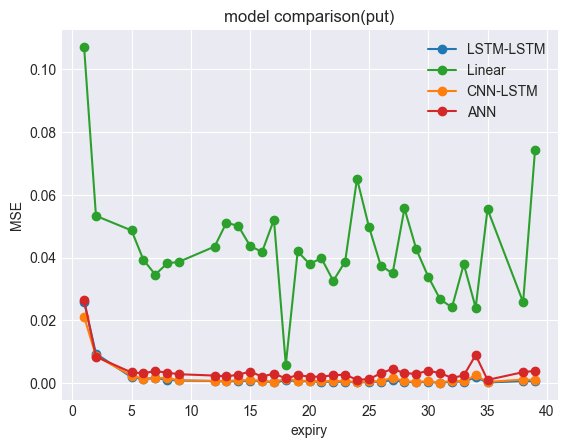

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_3772\1584972952.py:246: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


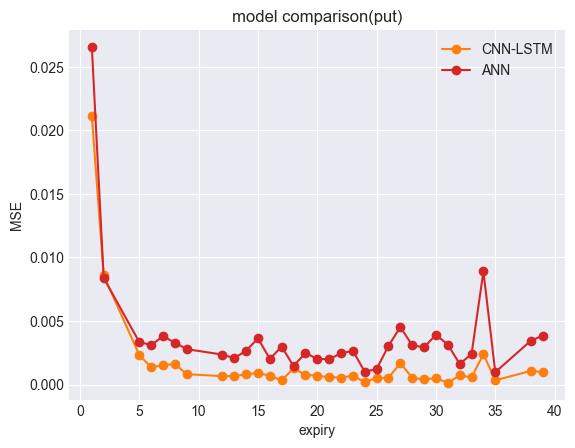

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_3772\1584972952.py:258: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


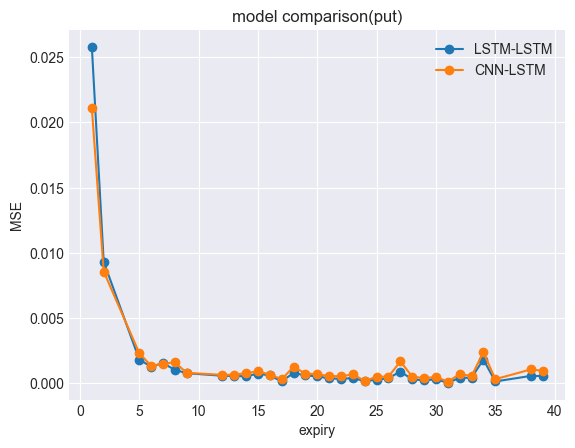

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_3772\1584972952.py:270: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


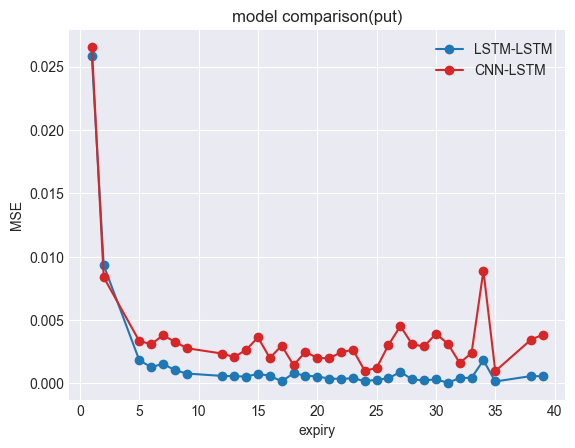

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
s_c = '結算價'

expiry = 'NearbyMonth'
K_num=100
type_ = 'call'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

model_type = 'TimeLinear'
seq_length1 = 30
seq_length2 = seq_length1+1
min_contract_day = 2
forecast_variable = 'slope'
model_path = './../../../'
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'

file_path = model_path + 'model1.csv'
Linear_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
Linear_matrix = np.array(Linear_Data)
columns_names = ['到期天數', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c)]

column_index = [Linear_Data.columns.get_loc(col) for col in columns_names]
Linear_expiry = np.unique(Linear_matrix[:,column_index[0]])
LinearExpiryMSE = np.zeros((len(Linear_expiry)))
LinearExpiryMAE = np.zeros((len(Linear_expiry)))
LinearExpiryMAPE = np.zeros((len(Linear_expiry)))

for i in range(len(Linear_expiry)):
    Linear_expiry_matrix = Linear_matrix[np.equal(Linear_matrix[:, column_index[0]], Linear_expiry[i])]
    y = Linear_expiry_matrix[:, column_index[1]]
    y_hat = Linear_expiry_matrix[:, column_index[2]]
    L2_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
    for j in range(len(L2_Distance)):
        y_day = y[j*K_num:(j+1)*K_num]
        y_hat_day = y_hat[j*K_num:(j+1)*K_num]
        l1_distance = np.sum(abs(y_day - y_hat_day))
        l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
        l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

        L2_Distance[j] = l2_distance
        L1_Distance[j] = l1_distance
        L1_Distance_a[j] = l1_distance_a

    MSE = np.mean(L2_Distance)
    MAE = np.mean(L1_Distance)
    #RMSE = np.sqrt(MSE)
    MAPE = np.mean(L1_Distance_a)
    LinearExpiryMAE[i] = MAE
    LinearExpiryMSE[i] = MSE
    LinearExpiryMAPE[i] = MAPE











#--------------------------------------------------------------------------------
model_type = 'ANN'
seq_length1 = 7
seq_length2 = seq_length1+1
min_contract_day = 2
forecast_variable = 'slope'
model_path = './../../../'
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'
file_path = model_path + 'model1.csv'
ANN_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
ANN_matrix = np.array(ANN_Data)


ANN_expiry = np.unique(ANN_matrix[:,column_index[0]])
ANNExpiryMSE = np.zeros((len(ANN_expiry)))
ANNExpiryMAE = np.zeros((len(ANN_expiry)))
ANNExpiryMAPE = np.zeros((len(ANN_expiry)))

for i in range(len(ANN_expiry)):
    ANN_expiry_matrix = ANN_matrix[np.equal(ANN_matrix[:, column_index[0]], ANN_expiry[i])]
    y = ANN_expiry_matrix[:, column_index[1]]
    y_hat = ANN_expiry_matrix[:, column_index[2]]
    L2_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
    for j in range(len(L2_Distance)):
        y_day = y[j*K_num:(j+1)*K_num]
        y_hat_day = y_hat[j*K_num:(j+1)*K_num]
        l1_distance = np.sum(abs(y_day - y_hat_day))
        l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
        l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

        L2_Distance[j] = l2_distance
        L1_Distance[j] = l1_distance
        L1_Distance_a[j] = l1_distance_a

    MSE = np.mean(L2_Distance)
    MAE = np.mean(L1_Distance)
    #RMSE = np.sqrt(MSE)
    MAPE = np.mean(L1_Distance_a)
    ANNExpiryMAE[i] = MAE
    ANNExpiryMSE[i] = MSE
    ANNExpiryMAPE[i] = MAPE

#-----------------------------------------------------------------------------------
model_type = 'LSTM-LSTM'
seq_length1 = 7
seq_length2 = seq_length1+1
min_contract_day = 2
forecast_variable = 'slope'
model_path = './../../../'
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'
file_path = model_path + 'model1.csv'
LSTM_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
LSTM_matrix = np.array(LSTM_Data)


LSTM_expiry = np.unique(LSTM_matrix[:,column_index[0]])
LSTMExpiryMSE = np.zeros((len(LSTM_expiry)))
LSTMExpiryMAE = np.zeros((len(LSTM_expiry)))
LSTMExpiryMAPE = np.zeros((len(LSTM_expiry)))

for i in range(len(LSTM_expiry)):
    LSTM_expiry_matrix = LSTM_matrix[np.equal(LSTM_matrix[:, column_index[0]], LSTM_expiry[i])]
    y = LSTM_expiry_matrix[:, column_index[1]]
    y_hat = LSTM_expiry_matrix[:, column_index[2]]
    L2_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
    for j in range(len(L2_Distance)):
        y_day = y[j*K_num:(j+1)*K_num]
        y_hat_day = y_hat[j*K_num:(j+1)*K_num]
        l1_distance = np.sum(abs(y_day - y_hat_day))
        l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
        l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

        L2_Distance[j] = l2_distance
        L1_Distance[j] = l1_distance
        L1_Distance_a[j] = l1_distance_a

    MSE = np.mean(L2_Distance)
    MAE = np.mean(L1_Distance)
    #RMSE = np.sqrt(MSE)
    MAPE = np.mean(L1_Distance_a)
    LSTMExpiryMAE[i] = MAE
    LSTMExpiryMSE[i] = MSE
    LSTMExpiryMAPE[i] = MAPE

#-----------------------------------------------------------------------------------

model_type = 'CNN-LSTM'
seq_length1 = 7
seq_length2 = seq_length1+1
min_contract_day = 2
forecast_variable = 'slope'
model_path = './../../../'
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'
file_path = model_path + 'model1.csv'
CNN_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
CNN_matrix = np.array(CNN_Data)

CNN_expiry = np.unique(CNN_matrix[:,column_index[0]])
CNNExpiryMSE = np.zeros((len(CNN_expiry)))
CNNExpiryMAE = np.zeros((len(CNN_expiry)))
CNNExpiryMAPE = np.zeros((len(CNN_expiry)))

for i in range(len(LSTM_expiry)):
    CNN_expiry_matrix = CNN_matrix[np.equal(CNN_matrix[:, column_index[0]], CNN_expiry[i])]
    y = CNN_expiry_matrix[:, column_index[1]]
    y_hat = CNN_expiry_matrix[:, column_index[2]]
    L2_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
    for j in range(len(L2_Distance)):
        y_day = y[j*K_num:(j+1)*K_num]
        y_hat_day = y_hat[j*K_num:(j+1)*K_num]
        l1_distance = np.sum(abs(y_day - y_hat_day))
        l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
        l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

        L2_Distance[j] = l2_distance
        L1_Distance[j] = l1_distance
        L1_Distance_a[j] = l1_distance_a

    MSE = np.mean(L2_Distance)
    MAE = np.mean(L1_Distance)
    #RMSE = np.sqrt(MSE)
    MAPE = np.mean(L1_Distance_a)
    CNNExpiryMAE[i] = MAE
    CNNExpiryMSE[i] = MSE
    CNNExpiryMAPE[i] = MAPE


#-------------------------------------------------------------------------------

model_type = 'CNN-LSTM'
seq_length1 = 7
seq_length2 = seq_length1+1
min_contract_day = 2
forecast_variable = 'slope'
model_path = './../../../'
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'
file_path = model_path + 'model1.csv'
CNN_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
CNN_matrix = np.array(CNN_Data)

CNN_expiry = np.unique(CNN_matrix[:,column_index[0]])
CNNExpiryMSE = np.zeros((len(CNN_expiry)))
CNNExpiryMAE = np.zeros((len(CNN_expiry)))
CNNExpiryMAPE = np.zeros((len(CNN_expiry)))

for i in range(len(LSTM_expiry)):
    CNN_expiry_matrix = CNN_matrix[np.equal(CNN_matrix[:, column_index[0]], CNN_expiry[i])]
    y = CNN_expiry_matrix[:, column_index[1]]
    y_hat = CNN_expiry_matrix[:, column_index[2]]
    L2_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
    for j in range(len(L2_Distance)):
        y_day = y[j*K_num:(j+1)*K_num]
        y_hat_day = y_hat[j*K_num:(j+1)*K_num]
        l1_distance = np.sum(abs(y_day - y_hat_day))
        l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
        l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

        L2_Distance[j] = l2_distance
        L1_Distance[j] = l1_distance
        L1_Distance_a[j] = l1_distance_a

    MSE = np.mean(L2_Distance)
    MAE = np.mean(L1_Distance)
    #RMSE = np.sqrt(MSE)
    MAPE = np.mean(L1_Distance_a)
    CNNExpiryMAE[i] = MAE
    CNNExpiryMSE[i] = MSE
    CNNExpiryMAPE[i] = MAPE





plt.style.use('seaborn-darkgrid')
plt.title('model comparison({})'.format(type_))
plt.plot(LSTM_expiry, LSTMExpiryMSE, marker='o', label='LSTM-LSTM', c='#1f77b4')
plt.plot(Linear_expiry, LinearExpiryMSE, marker='o', label='Linear', c = '#2ca02c')
plt.plot(CNN_expiry, CNNExpiryMSE, marker='o', label='CNN-LSTM', c='#ff7f0e')
plt.plot(ANN_expiry, ANNExpiryMSE, marker='o', label='ANN', c = '#d62728')
plt.legend()
plt.xlabel('expiry')
plt.ylabel('MSE')
plt.show()


plt.style.use('seaborn-darkgrid')
plt.title('model comparison({})'.format(type_))
#plt.plot(LSTM_expiry, LSTMExpiryMSE, marker='o', label='LSTM-LSTM', c='#1f77b4')
#plt.plot(Linearexpiry, LinearExpiryMSE, marker='o', label='Linear')
plt.plot(CNN_expiry, CNNExpiryMSE, marker='o', label='CNN-LSTM', c='#ff7f0e')
plt.plot(ANN_expiry, ANNExpiryMSE, marker='o', label='ANN', c= '#d62728')
plt.legend()
plt.xlabel('expiry')
plt.ylabel('MSE')
plt.show()


plt.style.use('seaborn-darkgrid')
plt.title('model comparison({})'.format(type_))
plt.plot(LSTM_expiry, LSTMExpiryMSE, marker='o', label='LSTM-LSTM', c='#1f77b4')
#plt.plot(Linearexpiry, LinearExpiryMSE, marker='o', label='Linear')
plt.plot(CNN_expiry, CNNExpiryMSE, marker='o', label='CNN-LSTM', c='#ff7f0e')

plt.legend()
plt.xlabel('expiry')
plt.ylabel('MSE')
plt.show()


plt.style.use('seaborn-darkgrid')
plt.title('model comparison({})'.format(type_))
plt.plot(LSTM_expiry, LSTMExpiryMSE, marker='o', label='LSTM-LSTM', c='#1f77b4')
#plt.plot(Linearexpiry, LinearExpiryMSE, marker='o', label='Linear')
plt.plot(ANN_expiry, ANNExpiryMSE, marker='o', label='CNN-LSTM', c= '#d62728')
plt.legend()
plt.xlabel('expiry')
plt.ylabel('MSE')
plt.show()

同個模型，不同滯後天數做比較

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_12784\1819395509.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


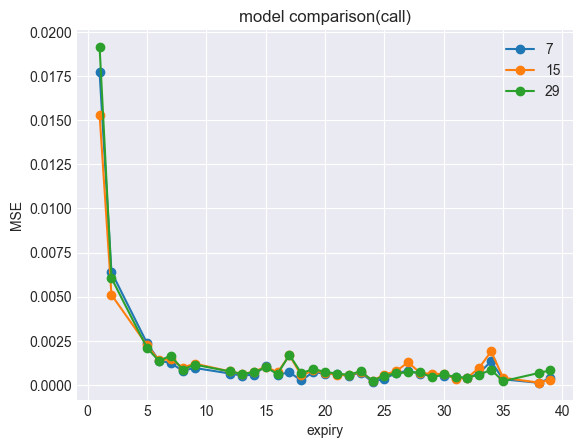

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
s_c = '結算價'

expiry = 'NearbyMonth'

type_ = 'call'
#type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])


model_type = 'CNN-LSTM'
SeqLength1 = [7, 15, 29]
min_contract_day = 2
forecast_variable = 'slope'
plt.style.use('seaborn-darkgrid')
plt.title('model comparison({})'.format(type_))
for seq_length1 in SeqLength1:
    model_path = './../../../'
    seq_length2 = seq_length1 + 1
    model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
        'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
    for model_dir in model_Dir_tree:
        #if model_dir not in os.listdir(model_path):
            #os.mkdir(model_path + model_dir)
        model_path = model_path + model_dir + '/'

    file_path = model_path + 'model1.csv'
    IV_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
    columns_names = ['到期天數', 'loss', '調整後loss']
    column_index = [IV_Data.columns.get_loc(col) for col in columns_names]
    IV_matrix = np.array(IV_Data)
    IV_expiry = np.unique(IV_matrix[:,column_index[0]])
    IV_ExpiryMSE = np.zeros((len(IV_expiry)))
    for i in range(len(IV_expiry)):
        IV_expiry_matrix = IV_matrix[np.equal(IV_matrix[:, column_index[0]], IV_expiry[i])]
        IV_expiry_loss = IV_expiry_matrix[:,column_index[1]]
        IV_expiry_mse = IV_expiry_loss.mean()
        IV_ExpiryMSE[i] = IV_expiry_mse
    plt.plot(IV_expiry, IV_ExpiryMSE, marker='o', label= seq_length1)
       

plt.xlabel('expiry')
plt.ylabel('MSE')
plt.legend()
plt.show()


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_3772\2897078543.py:67: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


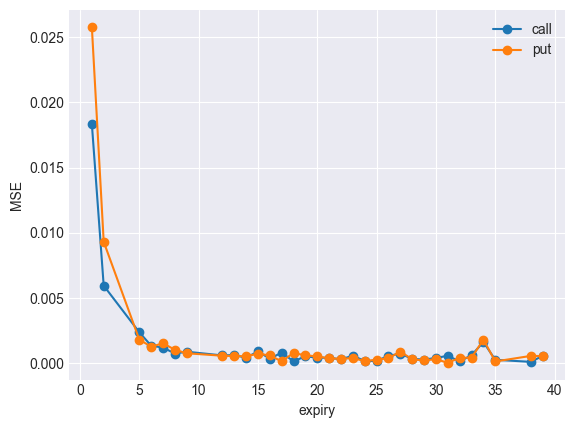

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
s_c = '結算價'

expiry = 'NearbyMonth'
K_num=100
type_ = 'call'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

model_type = 'LSTM-LSTM'
seq_length1 = 7
seq_length2 = seq_length1+1
min_contract_day = 2
forecast_variable = 'slope'
model_path = './../../../'
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'

file_path = model_path + 'model1.csv'
Linear_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
Linear_matrix = np.array(Linear_Data)
columns_names = ['到期天數', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c)]

column_index = [Linear_Data.columns.get_loc(col) for col in columns_names]
Linear_expiry = np.unique(Linear_matrix[:,column_index[0]])
LinearExpiryMSE = np.zeros((len(Linear_expiry)))
LinearExpiryMAE = np.zeros((len(Linear_expiry)))
LinearExpiryMAPE = np.zeros((len(Linear_expiry)))

for i in range(len(Linear_expiry)):
    Linear_expiry_matrix = Linear_matrix[np.equal(Linear_matrix[:, column_index[0]], Linear_expiry[i])]
    y = Linear_expiry_matrix[:, column_index[1]]
    y_hat = Linear_expiry_matrix[:, column_index[2]]
    L2_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
    for j in range(len(L2_Distance)):
        y_day = y[j*K_num:(j+1)*K_num]
        y_hat_day = y_hat[j*K_num:(j+1)*K_num]
        l1_distance = np.sum(abs(y_day - y_hat_day))
        l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
        l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

        L2_Distance[j] = l2_distance
        L1_Distance[j] = l1_distance
        L1_Distance_a[j] = l1_distance_a

    MSE = np.mean(L2_Distance)
    MAE = np.mean(L1_Distance)
    #RMSE = np.sqrt(MSE)
    MAPE = np.mean(L1_Distance_a)
    LinearExpiryMAE[i] = MAE
    LinearExpiryMSE[i] = MSE
    LinearExpiryMAPE[i] = MAPE
plt.style.use('seaborn-darkgrid')
#plt.title('model comparison({})'.format(type_))

plt.plot(Linear_expiry, LinearExpiryMSE, marker='o', label='call')

#-----------------------------------------------------------

expiry = 'NearbyMonth'
K_num=100
type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

model_type = 'LSTM-LSTM'
seq_length1 = 7
seq_length2 = seq_length1+1
min_contract_day = 2
forecast_variable = 'slope'
model_path = './../../../'
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'

file_path = model_path + 'model1.csv'
Linear_Data = pd.read_csv(file_path, index_col=False, encoding='Big5')
Linear_matrix = np.array(Linear_Data)
columns_names = ['到期天數', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c)]

column_index = [Linear_Data.columns.get_loc(col) for col in columns_names]
Linear_expiry = np.unique(Linear_matrix[:,column_index[0]])
LinearExpiryMSE = np.zeros((len(Linear_expiry)))
LinearExpiryMAE = np.zeros((len(Linear_expiry)))
LinearExpiryMAPE = np.zeros((len(Linear_expiry)))

for i in range(len(Linear_expiry)):
    Linear_expiry_matrix = Linear_matrix[np.equal(Linear_matrix[:, column_index[0]], Linear_expiry[i])]
    y = Linear_expiry_matrix[:, column_index[1]]
    y_hat = Linear_expiry_matrix[:, column_index[2]]
    L2_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance = np.zeros(int(len(y_hat) / K_num))
    L1_Distance_a = np.zeros(int(len(y_hat) / K_num))
    for j in range(len(L2_Distance)):
        y_day = y[j*K_num:(j+1)*K_num]
        y_hat_day = y_hat[j*K_num:(j+1)*K_num]
        l1_distance = np.sum(abs(y_day - y_hat_day))
        l1_distance_a = np.sum(abs((y_day - y_hat_day) / y_day))
        l2_distance = np.sum((y_day - y_hat_day) * (y_day - y_hat_day))

        L2_Distance[j] = l2_distance
        L1_Distance[j] = l1_distance
        L1_Distance_a[j] = l1_distance_a

    MSE = np.mean(L2_Distance)
    MAE = np.mean(L1_Distance)
    #RMSE = np.sqrt(MSE)
    MAPE = np.mean(L1_Distance_a)
    LinearExpiryMAE[i] = MAE
    LinearExpiryMSE[i] = MSE
    LinearExpiryMAPE[i] = MAPE


#plt.title('model comparison({})'.format(type_))

plt.plot(Linear_expiry, LinearExpiryMSE, marker='o', label='put')

plt.xlabel('expiry')
plt.ylabel('MSE')
plt.legend()
plt.show()